In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

### Read datasets

In [2]:
df = pd.read_csv('reservoir_dataset.csv')
df

,FLOW_DATE,RESERVOIR,PRESENT_STORAGE_TMC,RES_LEVEL_FT,INFLOW_CUSECS,OUTFLOW_CUECS,YEAR,MONTH,DATE,DAY
0,2011-01-01,Hemavathi,31.60,2916.07,981.0,2001.0,2011,1,1,0
1,2012-01-01,Hemavathi,12.48,2886.90,111.0,4488.0,2012,1,1,0
2,2014-01-01,Hemavathi,11.64,2884.84,125.0,3225.0,2014,1,1,0
3,2015-01-01,Hemavathi,24.04,2906.38,104.0,4325.0,2015,1,1,0
4,2016-01-01,Hemavathi,6.23,2869.10,163.0,125.0,2016,1,1,0
...,...,...,...,...,...,...,...,...,...,...
13237,2020-02-29,Harangi,3.54,2834,40.0,40.0,2020,2,29,365
13238,2016-02-29,Kabini,8.35,2262.62,118.0,1000.0,2016,2,29,365
13239,2020-02-29,Kabini,15.48,2277.20,112.0,1700.0,2020,2,29,365
13240,2016-02-29,K.R.S,17.98,93.27,370.0,584.0,2016,2,29,365


In [3]:
df.set_index('FLOW_DATE', inplace=True)
df.head()

,RESERVOIR,PRESENT_STORAGE_TMC,RES_LEVEL_FT,INFLOW_CUSECS,OUTFLOW_CUECS,YEAR,MONTH,DATE,DAY
FLOW_DATE,,,,,,,,,
2011-01-01,Hemavathi,31.60,2916.07,981.0,2001.0,2011,1,1,0
2012-01-01,Hemavathi,12.48,2886.90,111.0,4488.0,2012,1,1,0
2014-01-01,Hemavathi,11.64,2884.84,125.0,3225.0,2014,1,1,0
2015-01-01,Hemavathi,24.04,2906.38,104.0,4325.0,2015,1,1,0
2016-01-01,Hemavathi,6.23,2869.10,163.0,125.0,2016,1,1,0


In [4]:
df = df[df['RESERVOIR'] == 'K.R.S'].sort_index()
df

,RESERVOIR,PRESENT_STORAGE_TMC,RES_LEVEL_FT,INFLOW_CUSECS,OUTFLOW_CUECS,YEAR,MONTH,DATE,DAY
FLOW_DATE,,,,,,,,,
2011-01-01,K.R.S,46.42,122.59,2029.0,2000.0,2011,1,1,0
2011-01-02,K.R.S,46.54,122.68,3084.0,1490.0,2011,1,2,1
2011-01-03,K.R.S,46.64,122.75,2776.0,1491.0,2011,1,3,2
2011-01-04,K.R.S,46.69,122.79,2311.0,1491.0,2011,1,4,3
2011-01-05,K.R.S,46.70,122.80,1847.0,1491.0,2011,1,5,4
...,...,...,...,...,...,...,...,...,...
2020-12-12,K.R.S,43.04,120,3496.0,3308.0,2020,12,12,345
2020-12-13,K.R.S,43.02,119.98,3197.0,3300.0,2020,12,13,346
2020-12-14,K.R.S,42.98,119.95,3026.0,3273.0,2020,12,14,347


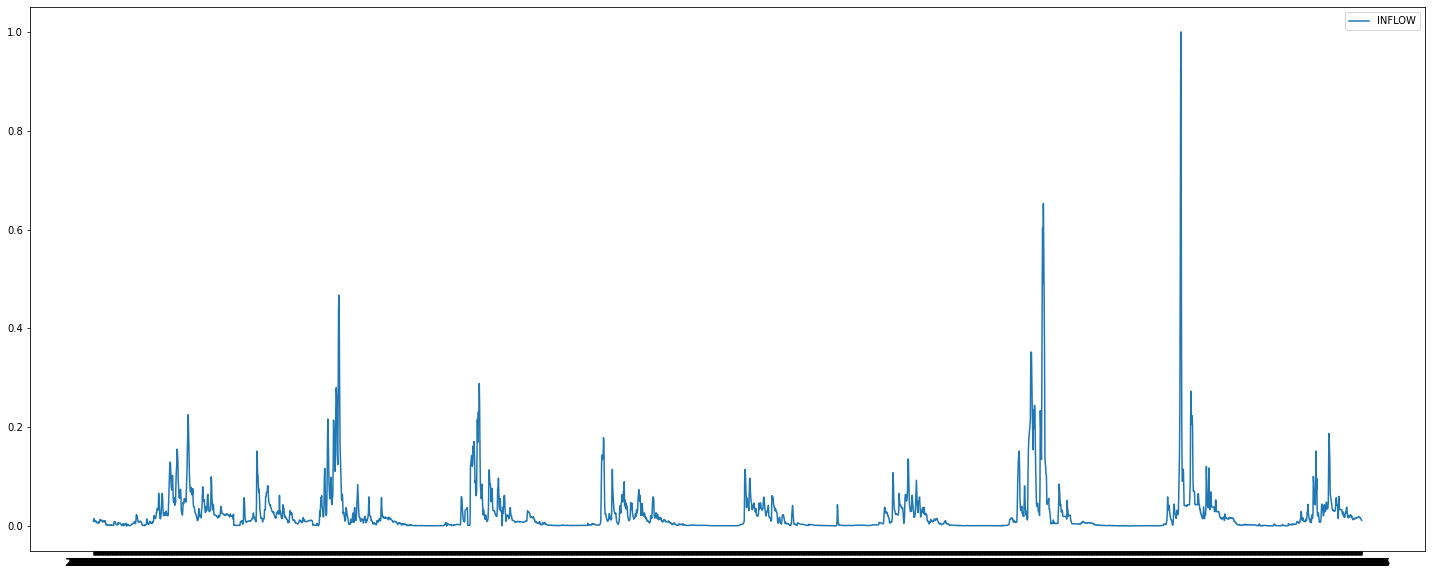

In [5]:
plt.figure(figsize=(25, 10))
# plt.plot(df['RAINFALL'] / df['RAINFALL'].max(), label='RAINFALL')
plt.plot(df['INFLOW_CUSECS'] / df['INFLOW_CUSECS'].max(), label='INFLOW')
plt.legend()
plt.show()

In [6]:
df_bkp = df.copy()

In [7]:
df.sort_values('INFLOW_CUSECS', ascending=False).head(5)

,RESERVOIR,PRESENT_STORAGE_TMC,RES_LEVEL_FT,INFLOW_CUSECS,OUTFLOW_CUECS,YEAR,MONTH,DATE,DAY
FLOW_DATE,,,,,,,,,
2019-08-12,K.R.S,41.63,122.30,204200.0,151365.0,2019,8,12,223
2019-08-11,K.R.S,37.08,118.75,187721.0,57423.0,2019,8,11,222
2018-08-18,K.R.S,43.81,120.60,133279.0,123472.0,2018,8,18,229
2018-08-16,K.R.S,44.93,121.46,123145.0,122496.0,2018,8,16,227
2018-08-19,K.R.S,44.30,120.98,115638.0,109815.0,2018,8,19,230


In [8]:
desc = df['INFLOW_CUSECS'].describe([.25, .5, .75, .85, .90, .95, .99, .999])
desc

count      3308.000000
mean       4915.388150
std       10696.096153
min           0.000000
25%         319.000000
50%        1717.000000
75%        5438.500000
85%        8417.950000
90%       11459.800000
95%       18786.850000
99%       47657.780000
99.9%    120840.351000
max      204200.000000
Name: INFLOW_CUSECS, dtype: float64

In [9]:
desc['99%']

47657.7799999999

In [10]:
df = df[(df['INFLOW_CUSECS'] <= desc['99%'])].sort_index()
df

,RESERVOIR,PRESENT_STORAGE_TMC,RES_LEVEL_FT,INFLOW_CUSECS,OUTFLOW_CUECS,YEAR,MONTH,DATE,DAY
FLOW_DATE,,,,,,,,,
2011-01-01,K.R.S,46.42,122.59,2029.0,2000.0,2011,1,1,0
2011-01-02,K.R.S,46.54,122.68,3084.0,1490.0,2011,1,2,1
2011-01-03,K.R.S,46.64,122.75,2776.0,1491.0,2011,1,3,2
2011-01-04,K.R.S,46.69,122.79,2311.0,1491.0,2011,1,4,3
2011-01-05,K.R.S,46.70,122.80,1847.0,1491.0,2011,1,5,4
...,...,...,...,...,...,...,...,...,...
2020-12-12,K.R.S,43.04,120,3496.0,3308.0,2020,12,12,345
2020-12-13,K.R.S,43.02,119.98,3197.0,3300.0,2020,12,13,346
2020-12-14,K.R.S,42.98,119.95,3026.0,3273.0,2020,12,14,347


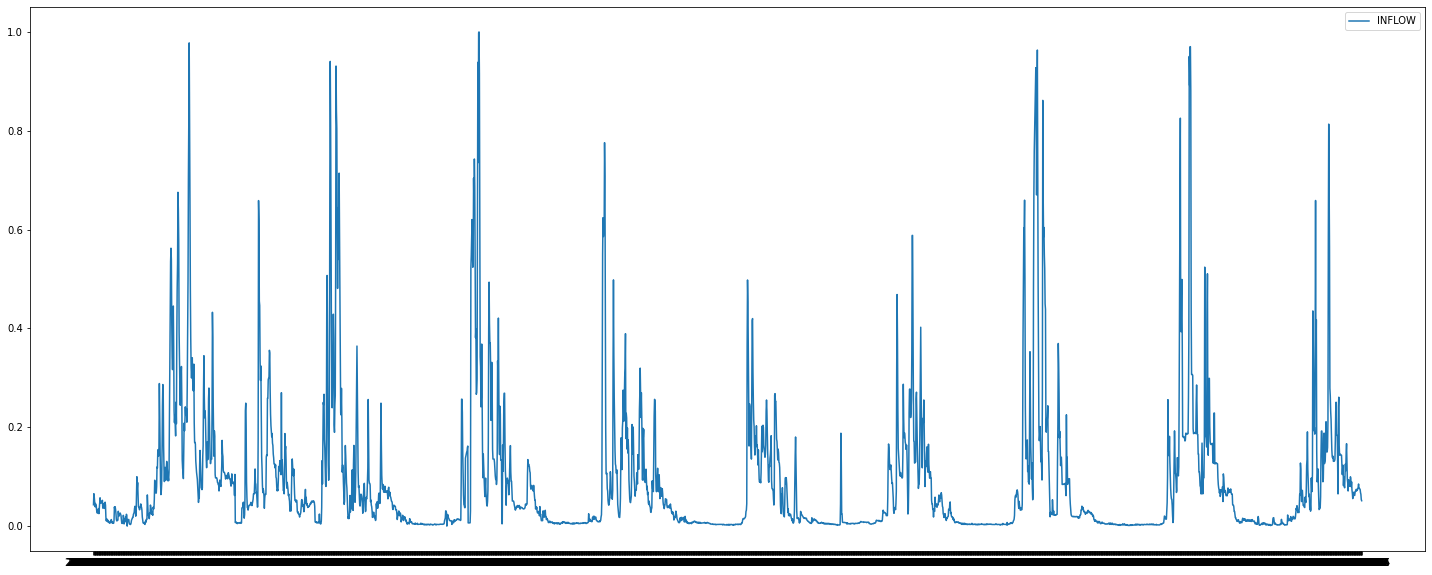

In [11]:
plt.figure(figsize=(25, 10))
# plt.plot(df['RAINFALL'] / df['RAINFALL'].max(), label='RAINFALL')
plt.plot(df['INFLOW_CUSECS'] / df['INFLOW_CUSECS'].max(), label='INFLOW')
plt.legend()
plt.show()

In [12]:
df.to_csv('reservoir_dataset_engg.csv', index=False)